In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("Iris.csv")

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.shape

(150, 6)

In [5]:
dataset["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
# We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.
dataset.shape

(150, 6)

In [8]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
dataset['SepalLengthCm'].iloc[0:5]=np.nan
dataset['PetalLengthCm'].iloc[0:5]=np.nan

C:\Users\hp\AppData\Local\Temp\ipykernel_10428\3587867291.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset['SepalLengthCm'].iloc[0:5]=np.nan
C:\Users\hp\AppData\Local\Temp\ipykernel_10428\3587867291.py:1: SettingWithCopyWarning: 


In [10]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,NaN,3.5,NaN,0.2,Iris-setosa
1,2,NaN,3.0,NaN,0.2,Iris-setosa
2,3,NaN,3.2,NaN,0.2,Iris-setosa
3,4,NaN,3.1,NaN,0.2,Iris-setosa
4,5,NaN,3.6,NaN,0.2,Iris-setosa


In [11]:
dataset.isna().sum()

Id               0
SepalLengthCm    5
SepalWidthCm     0
PetalLengthCm    5
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
dataset['SepalLengthCm']=dataset['SepalLengthCm'].fillna(dataset['SepalLengthCm'].mean())
dataset['PetalLengthCm']=dataset['PetalLengthCm'].fillna(dataset['PetalLengthCm'].mean())

In [13]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
# Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.
# dataset.groupby('Species').size()

dataset['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [15]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.877241,3.5,3.84,0.2,Iris-setosa
1,2,5.877241,3.0,3.84,0.2,Iris-setosa
2,3,5.877241,3.2,3.84,0.2,Iris-setosa
3,4,5.877241,3.1,3.84,0.2,Iris-setosa
4,5,5.877241,3.6,3.84,0.2,Iris-setosa


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values

y = dataset['Species'].values

In [18]:
# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

In [19]:
y[:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fitting with example data
le.fit(["paris", "paris", "tokyo", "amsterdam"])

# Example DataFrame creation
#data = {'Sex': ['Male', 'Female', 'Female', 'Male']}
#df = pd.DataFrame(data)

# Applying LabelEncoder on the 'Sex' column
le.fit(df["Sex"])
print(list(le.classes_))  # Output the classes


['Female', 'Male']


In [55]:
from sklearn.preprocessing import LabelEncoder

# Example labels including 'tokyo'
labels = ['paris', 'london', 'new york', 'tokyo']

# Fit the LabelEncoder with all possible labels
le = LabelEncoder()
le.fit(labels)

# Now transform, including 'tokyo'
transformed_labels = le.transform(["tokyo", "tokyo", "paris"])
print(transformed_labels)


[3 3 2]


In [56]:
list(le.inverse_transform([2, 2, 1]))

[np.str_('paris'), np.str_('paris'), np.str_('new york')]

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
y = LabelEncoder().fit_transform(y)
# dataset.head()

In [59]:
X[:10]

array([[5.87724138, 3.5       , 3.84      , 0.2       ],
       [5.87724138, 3.        , 3.84      , 0.2       ],
       [5.87724138, 3.2       , 3.84      , 0.2       ],
       [5.87724138, 3.1       , 3.84      , 0.2       ],
       [5.87724138, 3.6       , 3.84      , 0.2       ],
       [5.4       , 3.9       , 1.7       , 0.4       ],
       [4.6       , 3.4       , 1.4       , 0.3       ],
       [5.        , 3.4       , 1.5       , 0.2       ],
       [4.4       , 2.9       , 1.4       , 0.2       ],
       [4.9       , 3.1       , 1.5       , 0.1       ]])

In [60]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.877241,3.5,3.84,0.2,Iris-setosa
1,2,5.877241,3.0,3.84,0.2,Iris-setosa
2,3,5.877241,3.2,3.84,0.2,Iris-setosa
3,4,5.877241,3.1,3.84,0.2,Iris-setosa
4,5,5.877241,3.6,3.84,0.2,Iris-setosa


In [63]:
dataset2=dataset.copy()

In [64]:
dataset2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.877241,3.5,3.84,0.2,Iris-setosa
1,2,5.877241,3.0,3.84,0.2,Iris-setosa
2,3,5.877241,3.2,3.84,0.2,Iris-setosa
3,4,5.877241,3.1,3.84,0.2,Iris-setosa
4,5,5.877241,3.6,3.84,0.2,Iris-setosa


In [34]:
# dataset2.Species = dataset2.Species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [35]:
dataset2["Species"]=dataset2['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [36]:
dataset2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.877241,3.5,3.84,0.2,0
1,2,5.877241,3.0,3.84,0.2,0
2,3,5.877241,3.2,3.84,0.2,0
3,4,5.877241,3.1,3.84,0.2,0
4,5,5.877241,3.6,3.84,0.2,0


In [37]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.877241,3.054000,3.840000,1.198667
std,43.445368,0.806829,0.433594,1.708777,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.200000,2.800000,1.600000,0.300000
50%,75.500000,5.838621,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
features = dataset[dataset.columns[1:5]]

In [40]:
features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.877241,3.5,3.84,0.2
1,5.877241,3.0,3.84,0.2
2,5.877241,3.2,3.84,0.2
3,5.877241,3.1,3.84,0.2
4,5.877241,3.6,3.84,0.2
...,...,...,...,...
145,6.700000,3.0,5.20,2.3
146,6.300000,2.5,5.00,1.9
147,6.500000,3.0,5.20,2.0
148,6.200000,3.4,5.40,2.3


In [41]:
scaled_features = MinMaxScaler().fit_transform(features)

In [42]:
scaled_features

array([[0.43812261, 0.625     , 0.48135593, 0.04166667],
       [0.43812261, 0.41666667, 0.48135593, 0.04166667],
       [0.43812261, 0.5       , 0.48135593, 0.04166667],
       [0.43812261, 0.45833333, 0.48135593, 0.04166667],
       [0.43812261, 0.66666667, 0.48135593, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [43]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
100


18: Tr:0-70, Te:71-100
    
28: Tr:0-10,50-100, Te: 11-49

SyntaxError: illegal target for annotation (2053210425.py, line 4)

In [67]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 640x480 with 0 Axes>

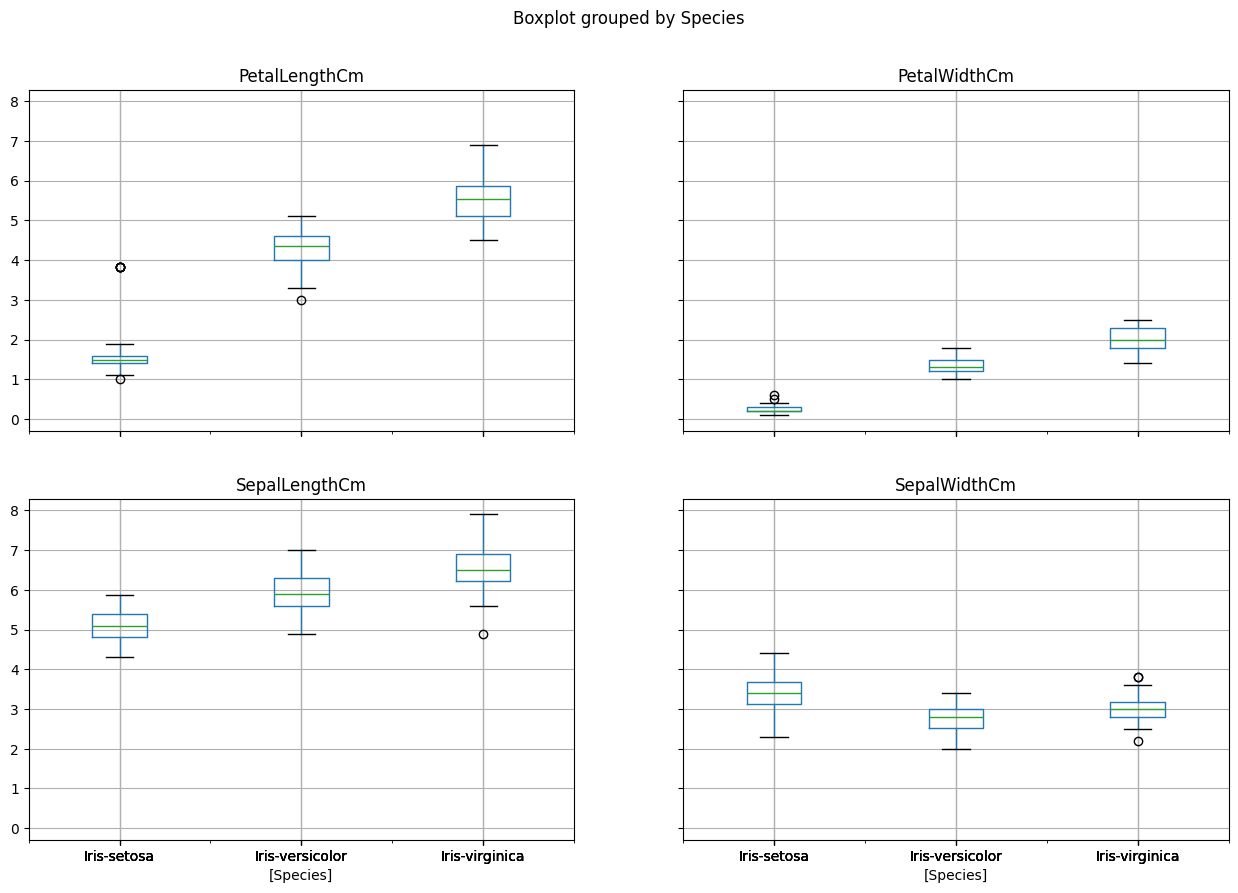

In [70]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

In [71]:
from sklearn.neighbors import KNeighborsClassifier



# from sklearn.metrics import confusion_matrix, accuracy_score
# from sklearn.model_selection import cross_val_score

In [72]:
# Fitting the model
model=KNeighborsClassifier(n_neighbors=13).fit(X_train, y_train)

In [73]:
# Predicting the Test set results
y_pred = model.predict(X_test)

In [78]:
X_test[0]

array([7. , 3.2, 4.7, 1.4])

In [61]:
pwd

'C:\\Users\\hp\\ML file'

In [94]:
import joblib

joblib.dump(model, r"C:\Users\hp\ML file\knn_iris.pkl")

['C:\\Users\\hp\\ML file\\knn_iris.pkl']

In [95]:
load_model =  joblib.load(r"C:\Users\hp\ML file\knn_iris.pkl")

In [65]:
X_test.shape
# X_test[:5]

(45, 4)

In [66]:
y_pred

array([2, 1, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2,
       2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1,
       1])

In [67]:
# import joblib

# # Save the model as a pickle file
# model_details = './models/iris_knn_model.pkl'

# joblib.dump(model, model_details)

In [68]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100

# accuracy
print('Accuracy of our model is equal ' + str(round(accuracy, 1)) + ' %.')

Accuracy of our model is equal 93.3 %.


In [69]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.877241,3.5,3.84,0.2,Iris-setosa
1,2,5.877241,3.0,3.84,0.2,Iris-setosa
2,3,5.877241,3.2,3.84,0.2,Iris-setosa
3,4,5.877241,3.1,3.84,0.2,Iris-setosa
4,5,5.877241,3.6,3.84,0.2,Iris-setosa


In [70]:
x_new=np.array([[5.1,3.5,1.4,0.2]])

In [71]:
model.predict(x_new)

array([0])

In [73]:
k_list = list(range(1,50,2))

In [74]:
k_list

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
# creating list of K for KNN
k_list = list(range(1,50,2))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    

In [77]:
scores.mean()

np.float64(0.9066666666666666)

In [78]:
cv_scores

[np.float64(0.9266666666666665),
 np.float64(0.9333333333333332),
 np.float64(0.9333333333333333),
 np.float64(0.9333333333333333),
 np.float64(0.9400000000000001),
 np.float64(0.9333333333333333),
 np.float64(0.9466666666666667),
 np.float64(0.9400000000000001),
 np.float64(0.9400000000000001),
 np.float64(0.9400000000000001),
 np.float64(0.9333333333333332),
 np.float64(0.9400000000000001),
 np.float64(0.9333333333333332),
 np.float64(0.9333333333333332),
 np.float64(0.9199999999999999),
 np.float64(0.9133333333333333),
 np.float64(0.9133333333333333),
 np.float64(0.9133333333333333),
 np.float64(0.9133333333333333),
 np.float64(0.9199999999999999),
 np.float64(0.9199999999999999),
 np.float64(0.9133333333333333),
 np.float64(0.9),
 np.float64(0.9),
 np.float64(0.9066666666666666)]

In [79]:
from matplotlib import pyplot as plt
import seaborn as sns 

In [80]:
error=[]
for i in cv_scores:
    error.append(1-i)
# changing to misclassification error
#MSE = [round(1 - x, 3) for x in cv_scores]
#print(MSE)

In [81]:
error

[np.float64(0.07333333333333347),
 np.float64(0.06666666666666676),
 np.float64(0.06666666666666665),
 np.float64(0.06666666666666665),
 np.float64(0.05999999999999994),
 np.float64(0.06666666666666665),
 np.float64(0.053333333333333344),
 np.float64(0.05999999999999994),
 np.float64(0.05999999999999994),
 np.float64(0.05999999999999994),
 np.float64(0.06666666666666676),
 np.float64(0.05999999999999994),
 np.float64(0.06666666666666676),
 np.float64(0.06666666666666676),
 np.float64(0.08000000000000007),
 np.float64(0.08666666666666667),
 np.float64(0.08666666666666667),
 np.float64(0.08666666666666667),
 np.float64(0.08666666666666667),
 np.float64(0.08000000000000007),
 np.float64(0.08000000000000007),
 np.float64(0.08666666666666667),
 np.float64(0.09999999999999998),
 np.float64(0.09999999999999998),
 np.float64(0.09333333333333338)]

<Figure size 640x480 with 0 Axes>

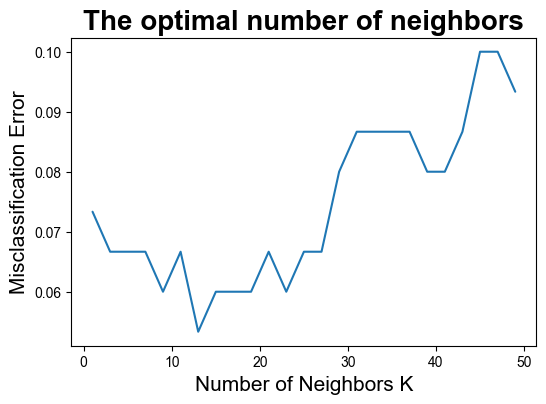

In [82]:
plt.figure()
plt.figure(figsize=(6,4))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, error)

plt.show()

In [ ]:
MSE

In [ ]:
x=min(MSE)

In [ ]:
x

In [ ]:
MSE.index(x)

In [ ]:
k_list[6]

In [ ]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [ ]:
matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

In [ ]:
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)